In [2]:
import pandas as pd

import azure_db_service

In [3]:
historical_transactions = azure_db_service.get_data_from_historical_transactions()

In [4]:
historical_transactions.head()

,chargingStationId,chg3phase,connectorId,curPower,energy,finished,idTag,lastSeen,maxPowerSeen,meterStart,meterStop,startTime,stopTime
transactionId,,,,,,,,,,,,,
4120714,ALFEN1,False,2,0.0,11570,True,04974FFAB63780,2018-08-08T14:31:30Z,3414.0,427150,438720.0,2018-08-08T07:14:40Z,2018-08-08T14:31:33+00:00
8590630,BLUEC2,True,1,0.0,11590,True,043661B2B63780,2018-08-08T15:48:06Z,21558.0,483890,495480.0,2018-08-08T06:30:24Z,2018-08-08T15:48:11+00:00
9330752,ALFEN1,False,1,0.0,10800,True,044627B2B63780,2018-08-08T14:52:45Z,6618.0,928160,938960.0,2018-08-08T07:52:35Z,2018-08-08T14:52:43+00:00
1150705,ALFEN1,False,1,0.0,17180,True,044D79B2B63780,2018-08-13T15:23:08Z,6799.0,938960,956140.0,2018-08-13T07:05:35Z,2018-08-13T15:23:02+00:00
2580630,ALFEN1,False,2,0.0,11200,True,04974FFAB63780,2018-08-13T15:55:29Z,3419.0,438720,449920.0,2018-08-13T06:29:54Z,2018-08-13T15:55:24+00:00


In [5]:
historical_transactions.columns

Index(['chargingStationId', 'chg3phase', 'connectorId', 'curPower', 'energy',
       'finished', 'idTag', 'lastSeen', 'maxPowerSeen', 'meterStart',
       'meterStop', 'startTime', 'stopTime'],
      dtype='object')

In [6]:
historical_transactions.describe()

,connectorId,curPower,energy,maxPowerSeen,meterStart,meterStop
count,203.000000,203.000000,203.000000,203.000000,2.030000e+02,2.030000e+02
mean,1.438424,451.166798,15608.768473,7939.118227,8.381472e+05,8.537560e+05
std,0.497421,1745.181595,10505.875346,5851.309212,3.652325e+05,3.662546e+05
min,1.000000,0.000000,0.000000,48.000000,3.154200e+05,3.288100e+05
25%,1.000000,0.000000,9680.000000,3529.500000,5.782700e+05,5.911250e+05
50%,1.000000,0.000000,11730.000000,6599.000000,7.529600e+05,7.589500e+05
75%,2.000000,0.000000,18185.000000,11271.000000,9.832300e+05,1.011820e+06
max,2.000000,16606.000000,59970.000000,22851.000000,1.984190e+06,1.988240e+06


In [7]:
transactions_by_user = historical_transactions['idTag']

In [8]:
transactions_by_user.head()

transactionId
4120714    04974FFAB63780
8590630    043661B2B63780
9330752    044627B2B63780
1150705    044D79B2B63780
2580630    04974FFAB63780
Name: idTag, dtype: object

In [76]:
power_data = azure_db_service.get_power_data_from_meter_values(4120714)

In [77]:
power_data.head()

,PartitionKey,chargingStationId,connectorId,timestampMeasurement,value
meterValueId,,,,,
001e42a7-0c5e-47c6-a5e0-9f4ca7ba3087,4120714,ALFEN1,2,2018-08-08T07:45:03Z,3406.080
0021062a-04da-4a3a-a1fe-92b057f76e8c,4120714,ALFEN1,2,2018-08-08T13:04:43Z,0.000
00314cab-ff00-4d8f-9563-48d0cbde50a8,4120714,ALFEN1,2,2018-08-08T09:47:03Z,3390.400
0050db6a-e85f-4270-b383-4a63062d4a77,4120714,ALFEN1,2,2018-08-08T09:05:43Z,3386.180
0060eaa6-880b-4152-bba9-fa8fbde2e383,4120714,ALFEN1,2,2018-08-08T12:44:23Z,0.000


In [78]:
power_data.drop(['PartitionKey', 'chargingStationId', 'connectorId'], axis=1, inplace=True)

In [79]:
power_data.sort_values(by='timestampMeasurement', inplace=True)

In [127]:
power_data_cleaned = power_data

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(rc={'figure.figsize':(10,7)})

#power_data_cleaned = power_data_cleaned.set_index(power_data_cleaned.timestampMeasurement)
#power_data_cleaned.drop(['timestampMeasurement'], axis=1, inplace=True)

In [129]:
power_data_cleaned.head()

,timestampMeasurement,value
meterValueId,,
867ee0c0-d244-403d-9fb6-678ec00d1004,2018-08-08T07:14:43Z,0.000
57ef99f6-af53-4b4d-b15f-0ed2826bad96,2018-08-08T07:15:03Z,3211.290
f875bf61-019d-4ce9-ad6b-4624f025c014,2018-08-08T07:15:23Z,3282.190
22fcf2d6-2f90-415b-8fec-25b9fd857e62,2018-08-08T07:15:43Z,3324.700
4cbf93fd-c0ea-4320-83a6-54970e278dd6,2018-08-08T07:16:03Z,3334.500


In [130]:
power_data_cleaned_super_cleaned = power_data_cleaned[1:111]

In [131]:
power_data_cleaned_super_cleaned.head()
power_data_cleaned_super_cleaned['timestampMeasurement'] = pd.to_datetime(power_data_cleaned_super_cleaned['timestampMeasurement'])
power_data_cleaned_super_cleaned['value'] = pd.to_numeric(power_data_cleaned_super_cleaned['value'])

/Users/ericmassip/anaconda3/envs/thesis3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/ericmassip/anaconda3/envs/thesis3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [132]:
power_data_cleaned_super_cleaned['new_formatted_date'] = power_data_cleaned_super_cleaned['timestampMeasurement'].dt.strftime('%H:%M:%S')
#power_data_cleaned_super_cleaned['new_formatted_date'] = pd.to_datetime(power_data_cleaned_super_cleaned['new_formatted_date'])
print(power_data_cleaned_super_cleaned['new_formatted_date'])

meterValueId
57ef99f6-af53-4b4d-b15f-0ed2826bad96    07:15:03
f875bf61-019d-4ce9-ad6b-4624f025c014    07:15:23
22fcf2d6-2f90-415b-8fec-25b9fd857e62    07:15:43
4cbf93fd-c0ea-4320-83a6-54970e278dd6    07:16:03
2b8e1555-3a16-4ee0-b885-4645c759443e    07:16:23
4ee88d08-2b85-45da-9e4c-1184d7e4fbc1    07:16:43
3956229c-b60c-4594-9a09-d418b58f00ca    07:17:03
d5713490-d666-4d7a-9c4b-fafb79ab1e8a    07:17:23
35eaf945-3329-4037-96e3-14dbc1deecd0    07:17:43
8f99b79a-00f1-4632-9442-4c2d1a421203    07:18:03
4a113543-1cd0-4063-9222-3035a7700b0d    07:18:23
2370216a-a8d6-4c95-b759-5f33c3e8194f    07:18:43
7ba552d2-dda0-4aa1-8965-e3abb8016684    07:19:03
b4a39a62-1f63-4478-845c-df5982f80145    07:19:23
f180ce3e-c955-4aad-90c7-c621675ab0d9    07:19:43
2880323a-bd4a-417d-b286-2c0237c5b91a    07:20:03
81ed7111-3118-4a81-90ef-7978e955b0d8    07:20:23
3dccd99e-b38c-4c58-92ac-0cd63046e41f    07:20:43
1b715462-6fea-4568-b14b-55367b4148dc    07:21:03
dfca36ce-687e-4d35-a6c2-e27178a7180f    07:21:23
a76ebc8

/Users/ericmassip/anaconda3/envs/thesis3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


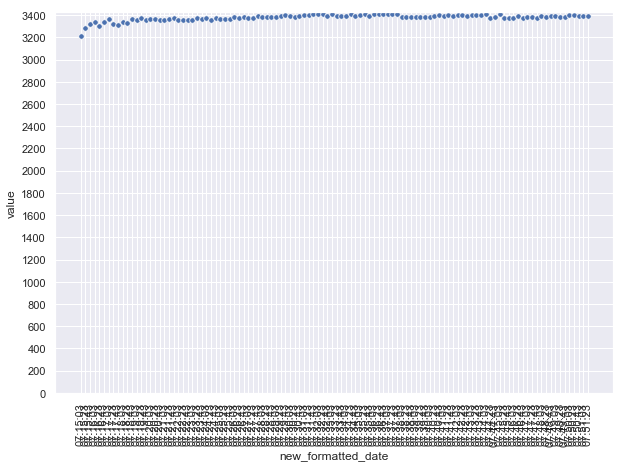

In [135]:
ax = sns.scatterplot(x="new_formatted_date", y="value", data=power_data_cleaned_super_cleaned, s=30)
#plt.xticks(range(1970, 2011, 10), fontsize=14)
maxValue = power_data_cleaned_super_cleaned.at[power_data_cleaned_super_cleaned['value'].idxmax(), 'value'].astype(np.int64)
ax.set_yticks(range(0, maxValue, 200))
_=plt.xticks(rotation=90)
plt.show()

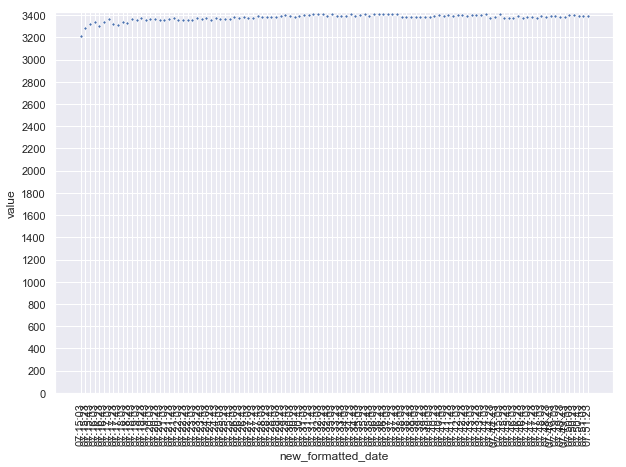

In [139]:
import matplotlib.dates as md

ax = sns.scatterplot(x="new_formatted_date", y="value", data=power_data_cleaned_super_cleaned, s=10)
maxValue = power_data_cleaned_super_cleaned.at[power_data_cleaned_super_cleaned['value'].idxmax(), 'value'].astype(np.int64)
ax.set_yticks(range(0, maxValue, 200))

#ax.set_xticks(power_data_cleaned_super_cleaned.new_formatted_date)
#ax.xaxis.set_major_locator(md.MinuteLocator(interval=15))
#ax.xaxis.set_major_formatter(md.DateFormatter("%H:%M:%S"))
#ax.xaxis.set_minor_formatter(md.DateFormatter("%H:%M:%S"))

_=plt.xticks(rotation=90)

plt.show()

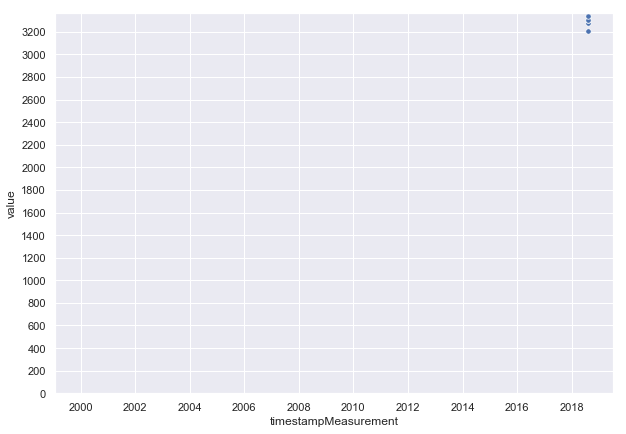

In [103]:
ax = sns.scatterplot(x="timestampMeasurement", y="value", data=power_data_cleaned_super_cleaned, s=30)
#plt.xticks(range(1970, 2011, 10), fontsize=14)
maxValue = power_data_cleaned_super_cleaned.at[power_data_cleaned_super_cleaned['value'].idxmax(), 'value'].astype(np.int64)
ax.set_yticks(range(0, maxValue, 200))
plt.show()

##### s = size of the dots